Imports

In [2]:
import pandas as pd
import numpy as np
from random import gauss
from pandas.plotting import autocorrelation_plot
import warnings
import itertools
from random import random

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10
    
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

In [4]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

<AxesSubplot:xlabel='date'>

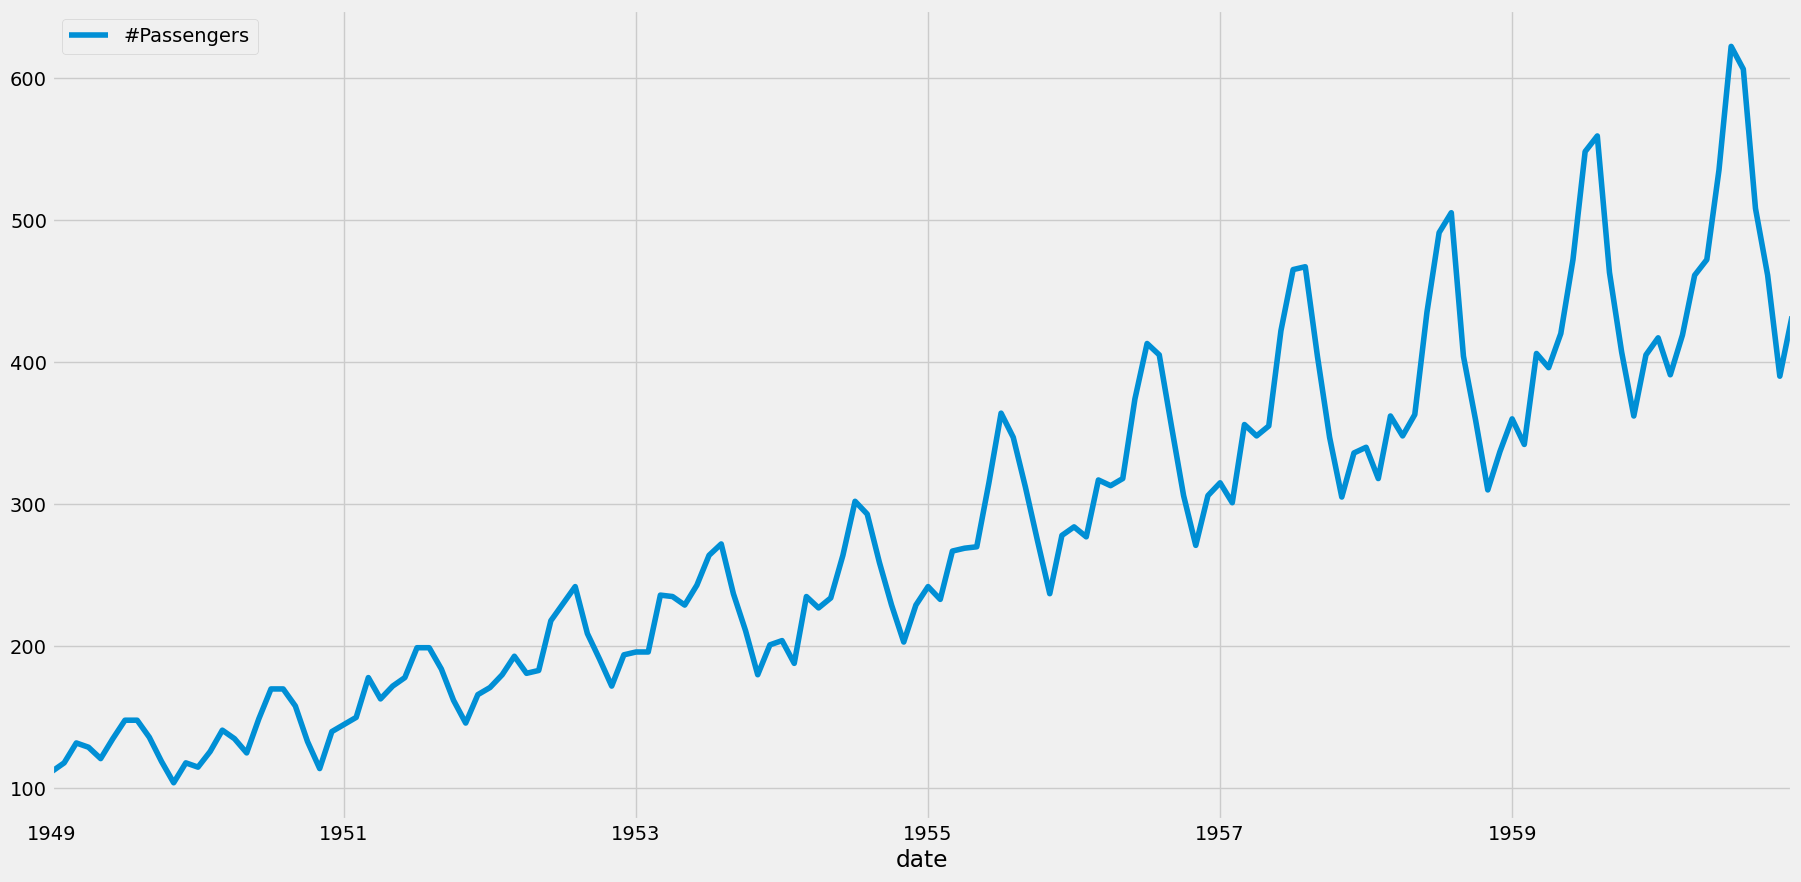

In [5]:
series = pd.read_csv("datasets/AirPassengers.csv")
series["date"] = pd.to_datetime(series['Month'])
series.set_index('date').plot()

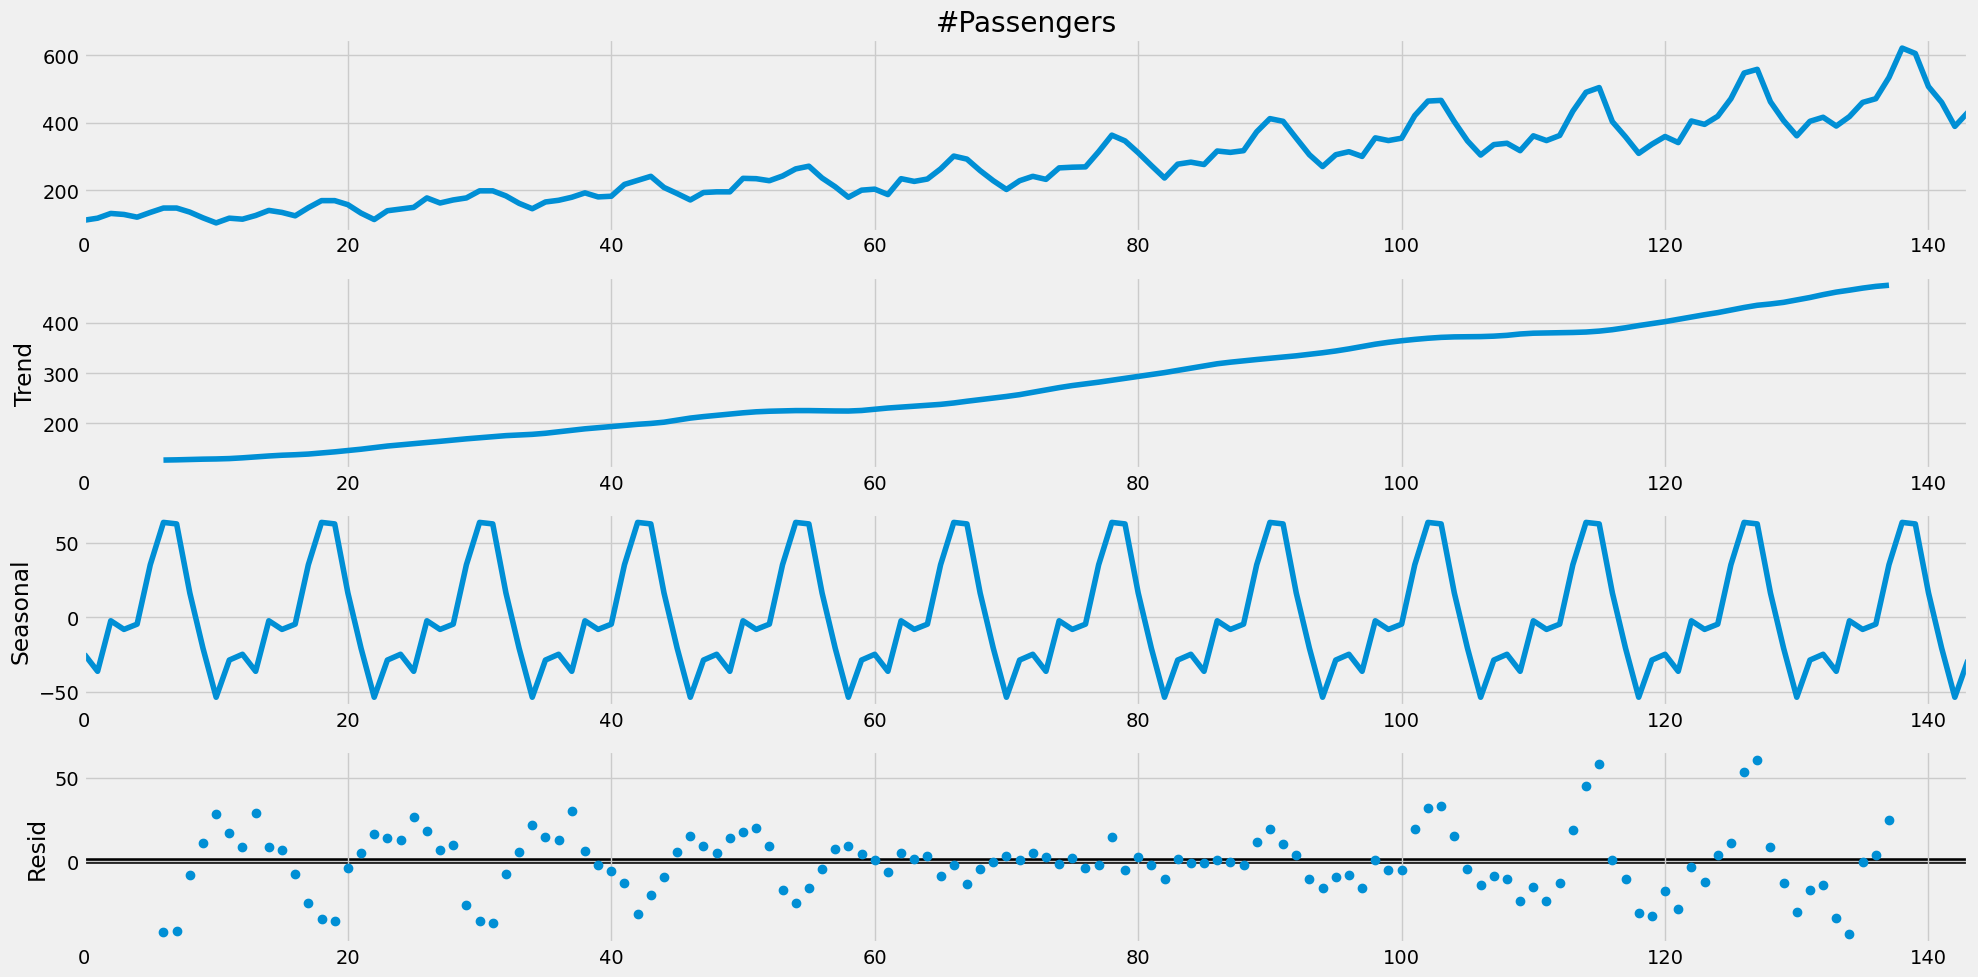

In [6]:
decomposition = sm.tsa.seasonal_decompose(series["#Passengers"], period=12)
figure = decomposition.plot()
plt.show()

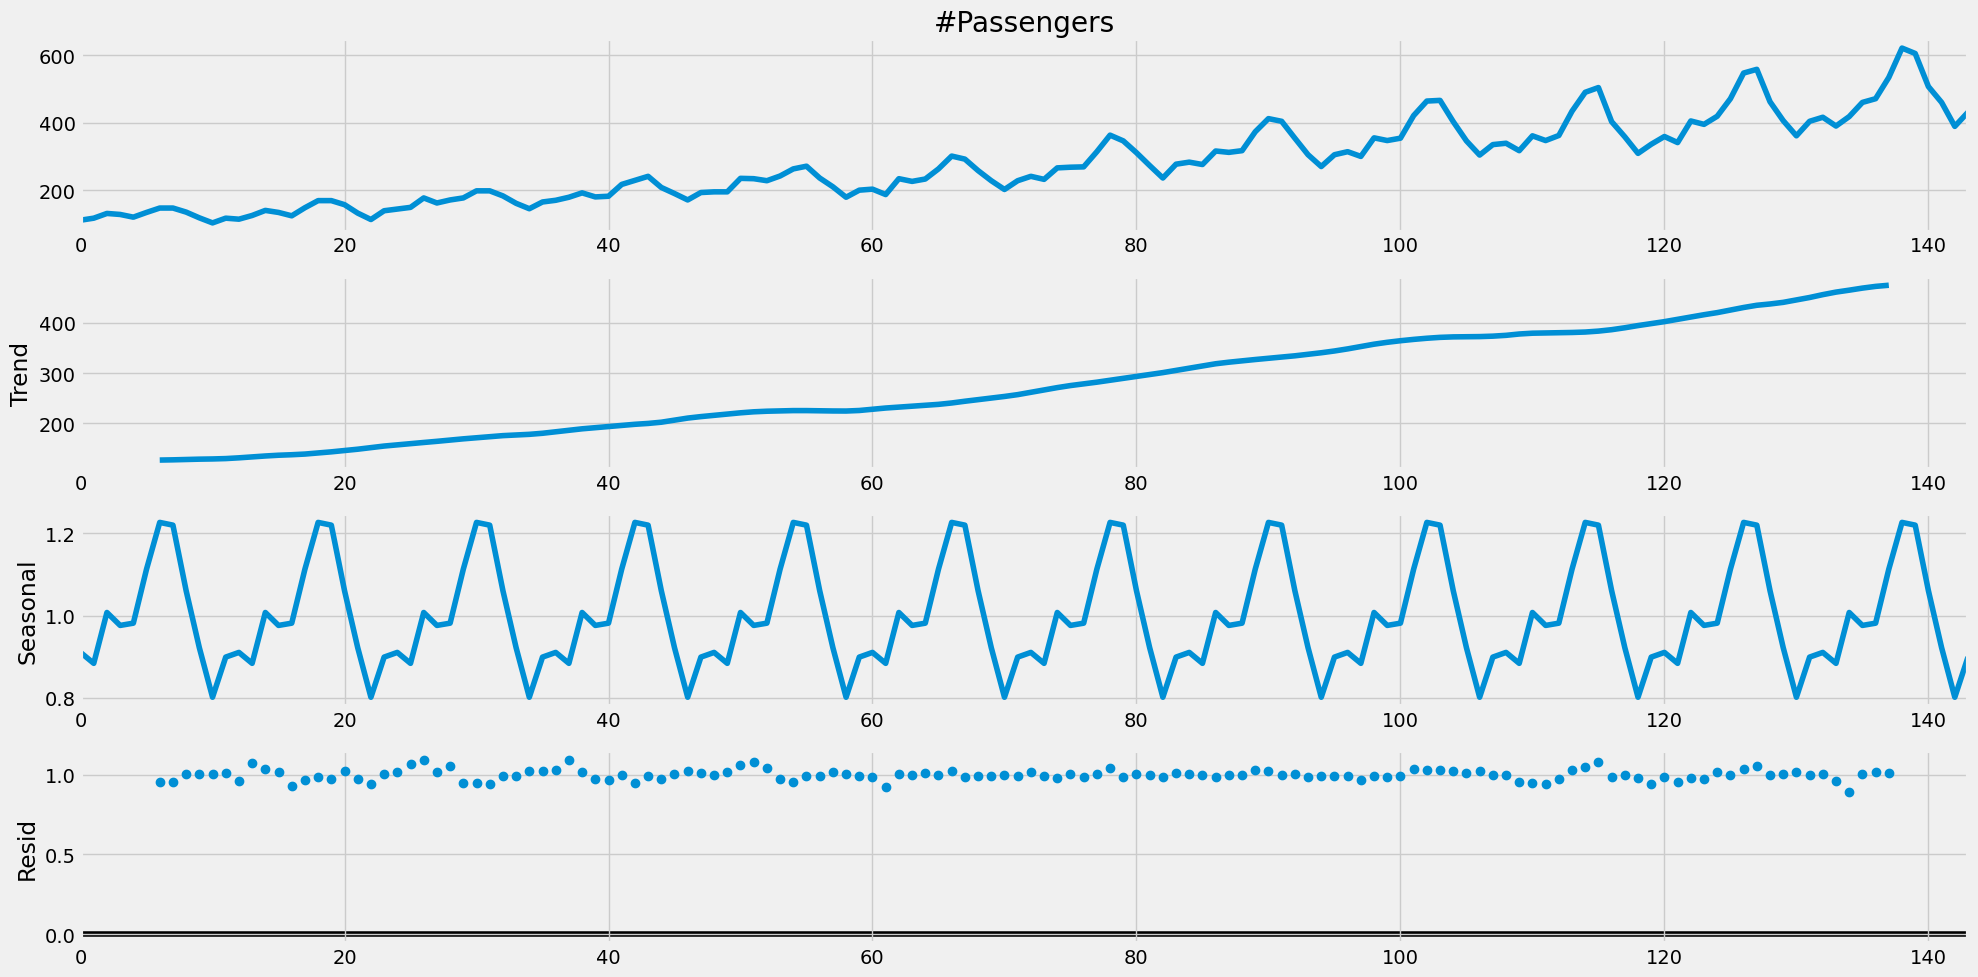

In [7]:
decomposition = sm.tsa.seasonal_decompose(series["#Passengers"], period=12, model="multiplicative")
figure = decomposition.plot()
plt.show()

## Stationary Time Series
The core idea is that it's much easier to model dynamic behavior over time if the statistical properties do not change: oscillations happen around the same level, the amplitude does not change too much etc (in other words, the probability distribution of $X_t$ is the same as the distribution of $X_{t+h}$)- such models are well understood. Algorithms are likely to yield better predictions if we apply them to stationary processes, because we do not need to worry about e.g. concept drift between our training and test sets.

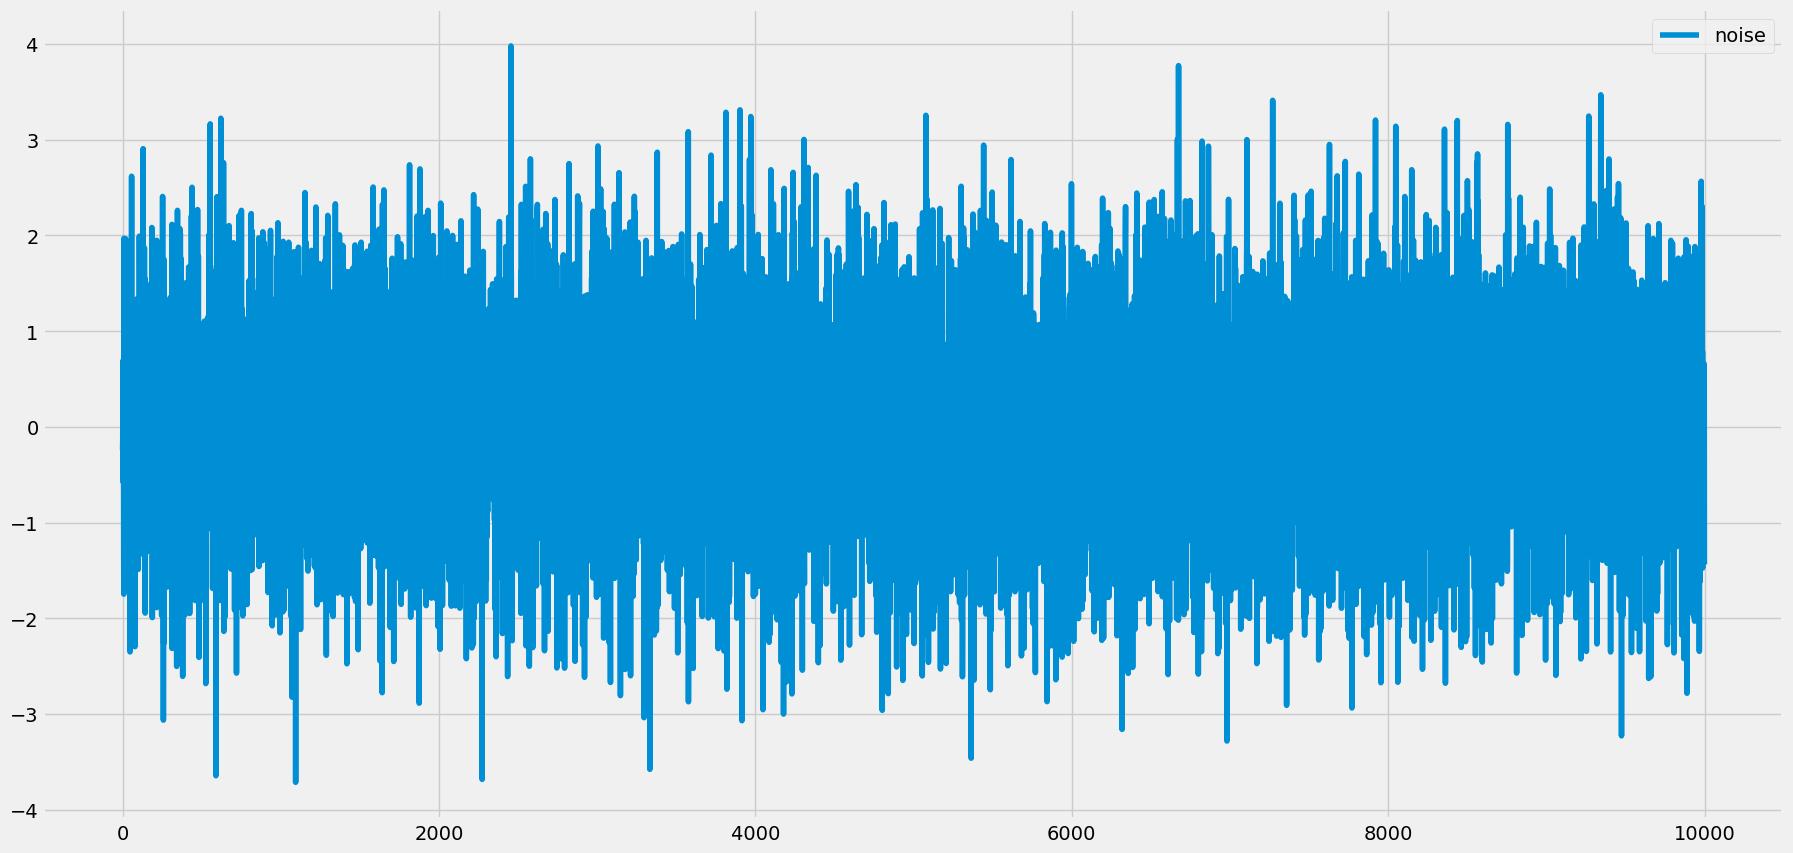

In [8]:
xseries = pd.DataFrame(data = np.random.normal(0, 1, 10000), columns=['noise'])
xseries.plot()
print()

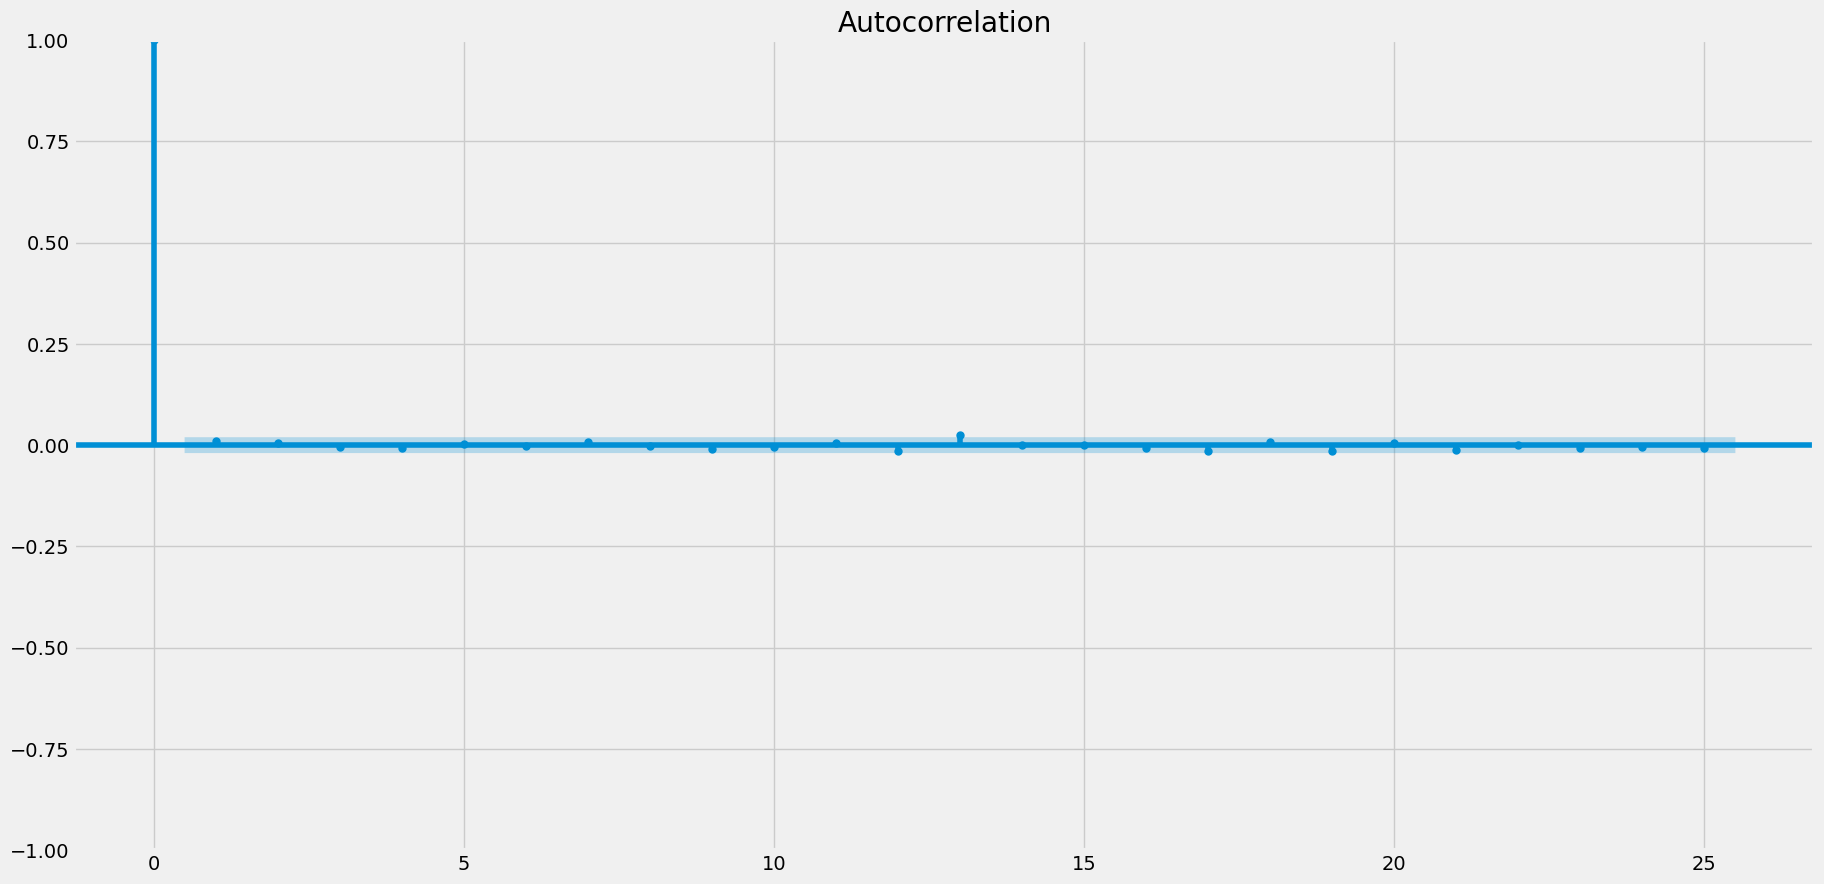

In [9]:
plot_acf(xseries["noise"], lags=25)
print()

/Users/mananshah/miniforge3/envs/ts_env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


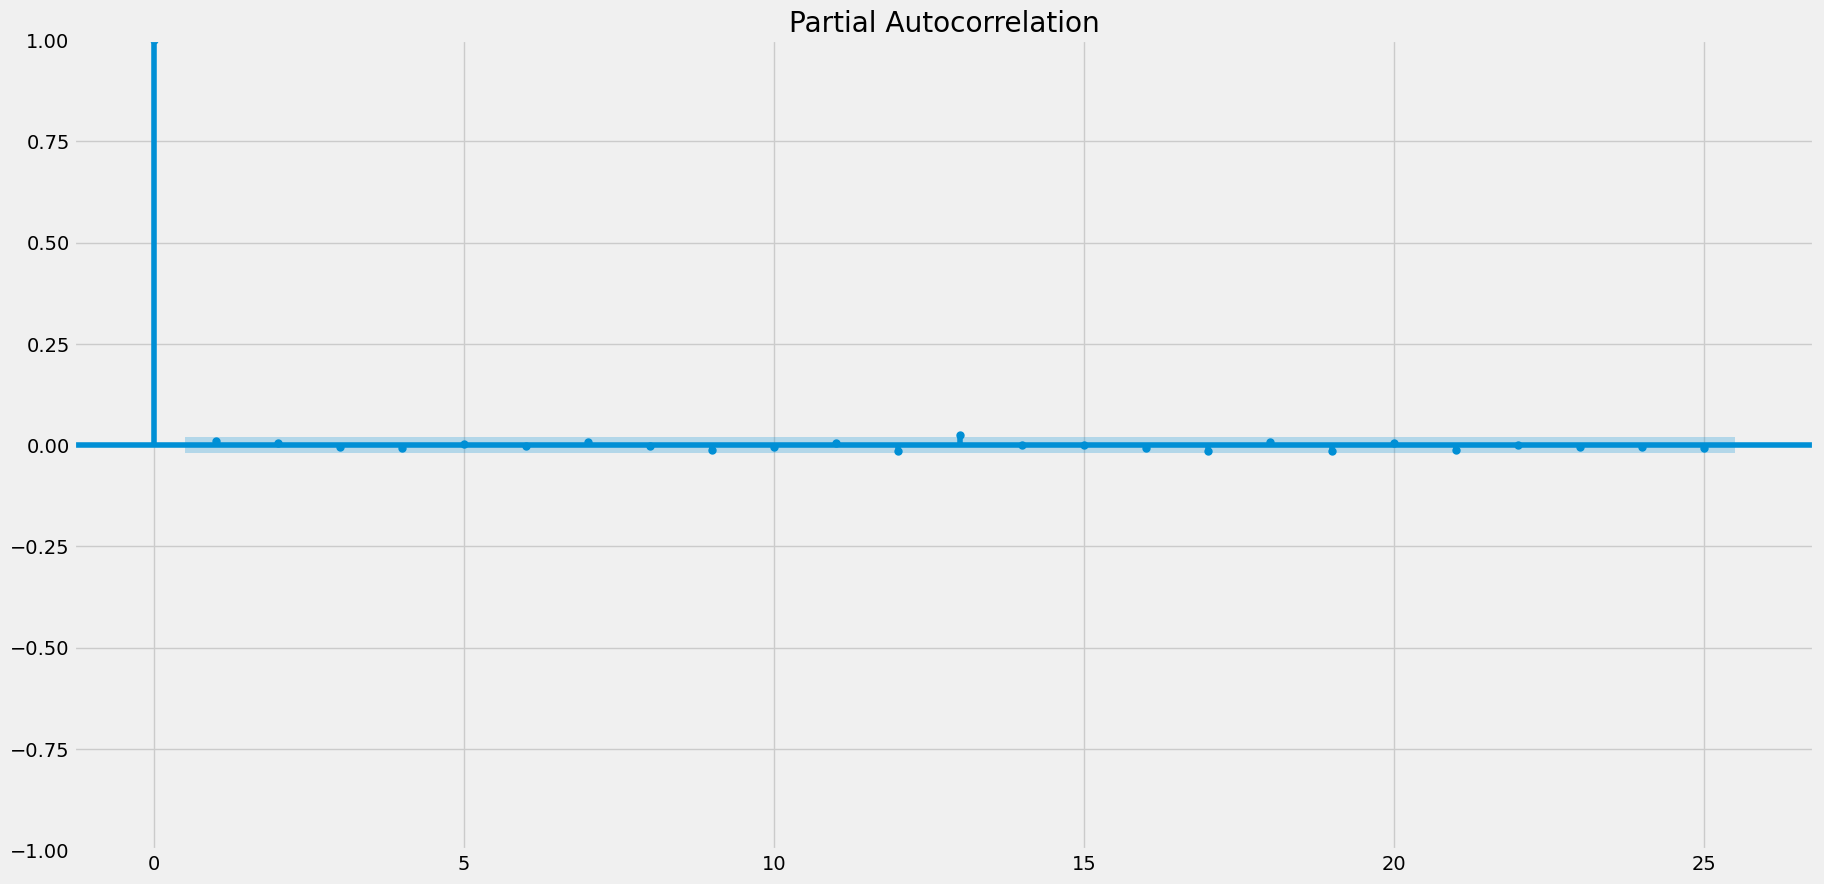

In [10]:
plot_pacf(xseries["noise"], lags=25)
print()

In [11]:
X = series["#Passengers"].values
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('var:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

mean:
chunk1: 182.90 vs chunk2: 377.69
var:
chunk1: 2244.09 vs chunk2: 7367.96


## Transforming a timeseries from non stationary to stationary

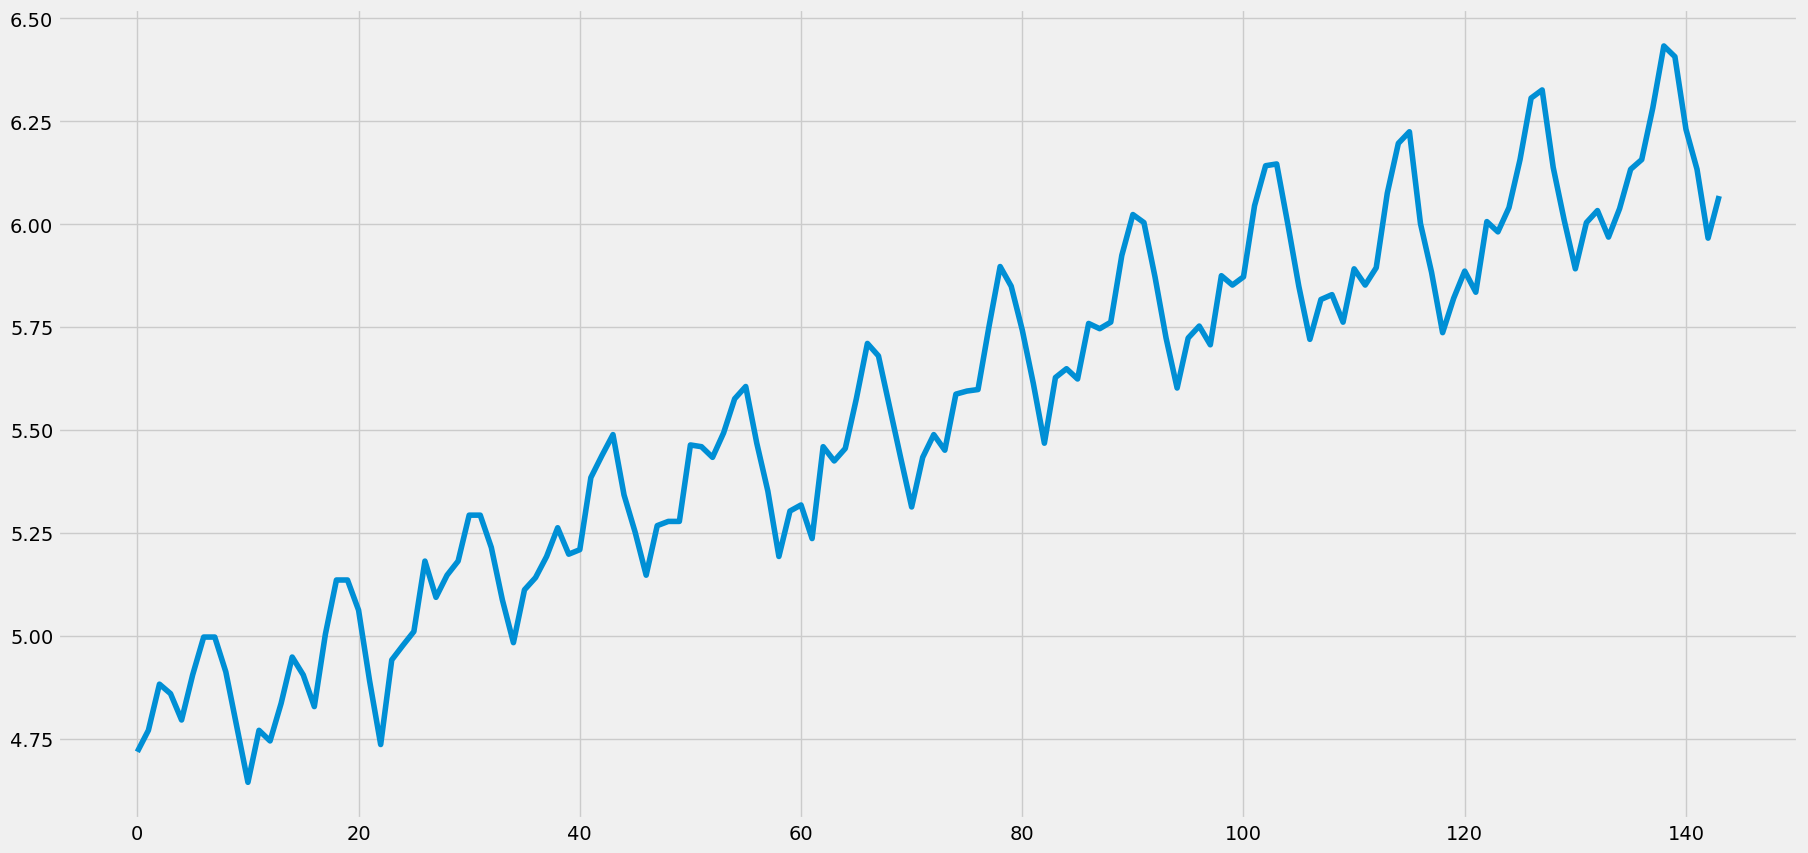

In [12]:
series["passengers2"] = np.log(series["#Passengers"])
series.passengers2.plot()
plt.show()

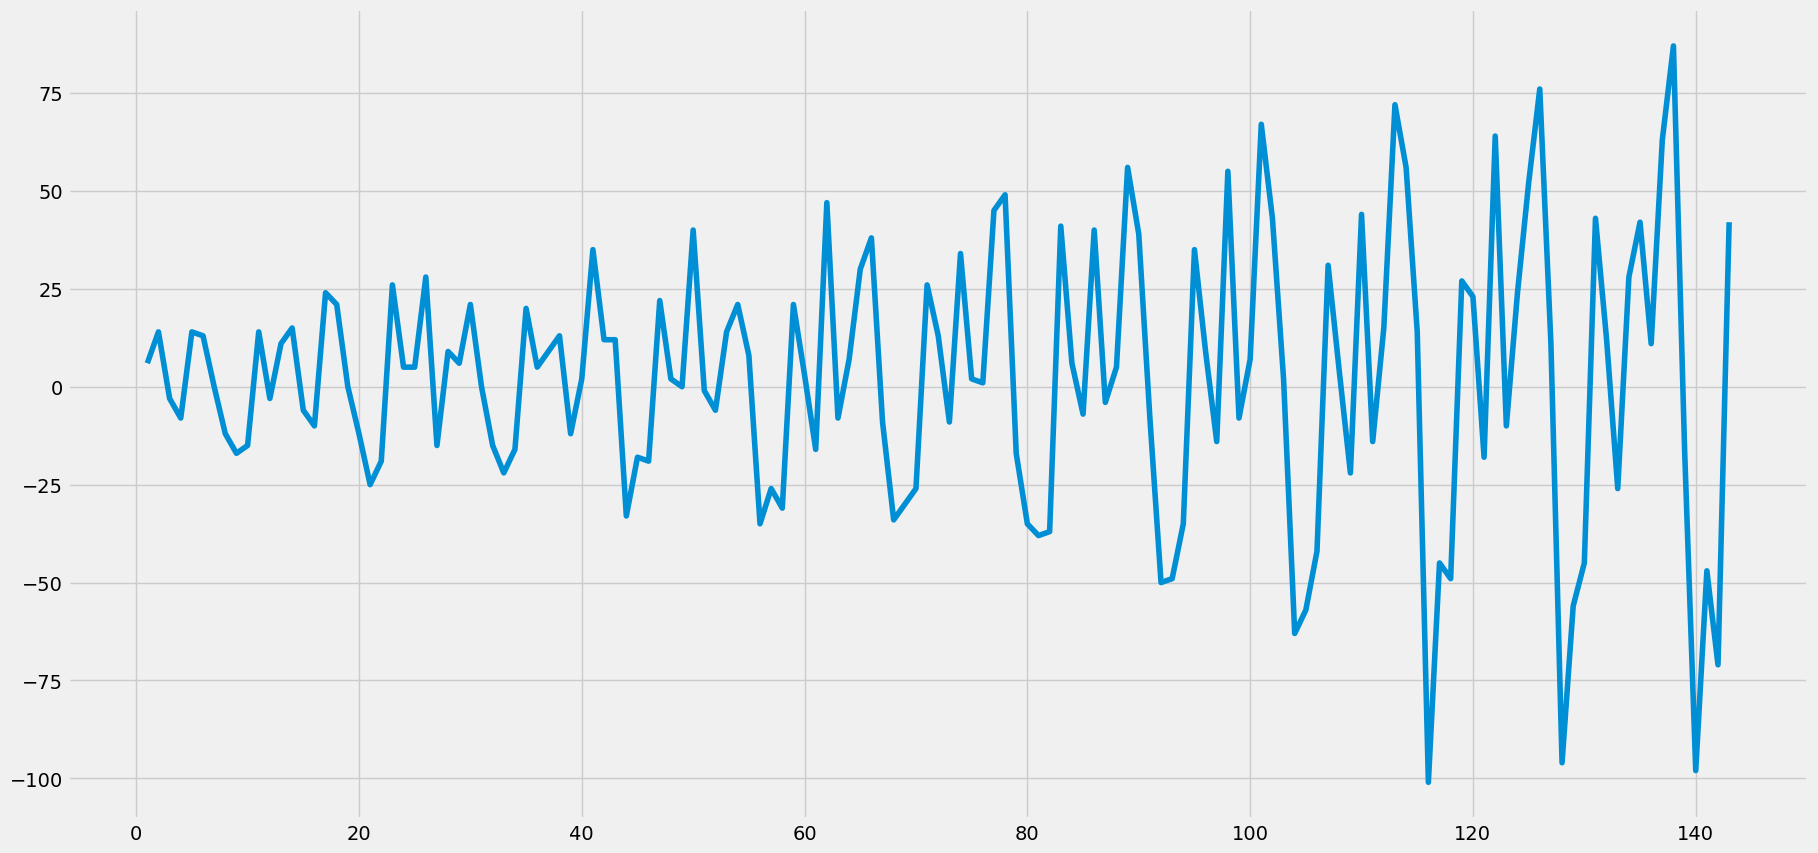

In [15]:
series["passengers3"] = series["#Passengers"].diff()
series.passengers3.plot()
plt.show()

In [20]:
result = adfuller(series.passengers3[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.830154
p-value: 0.054094


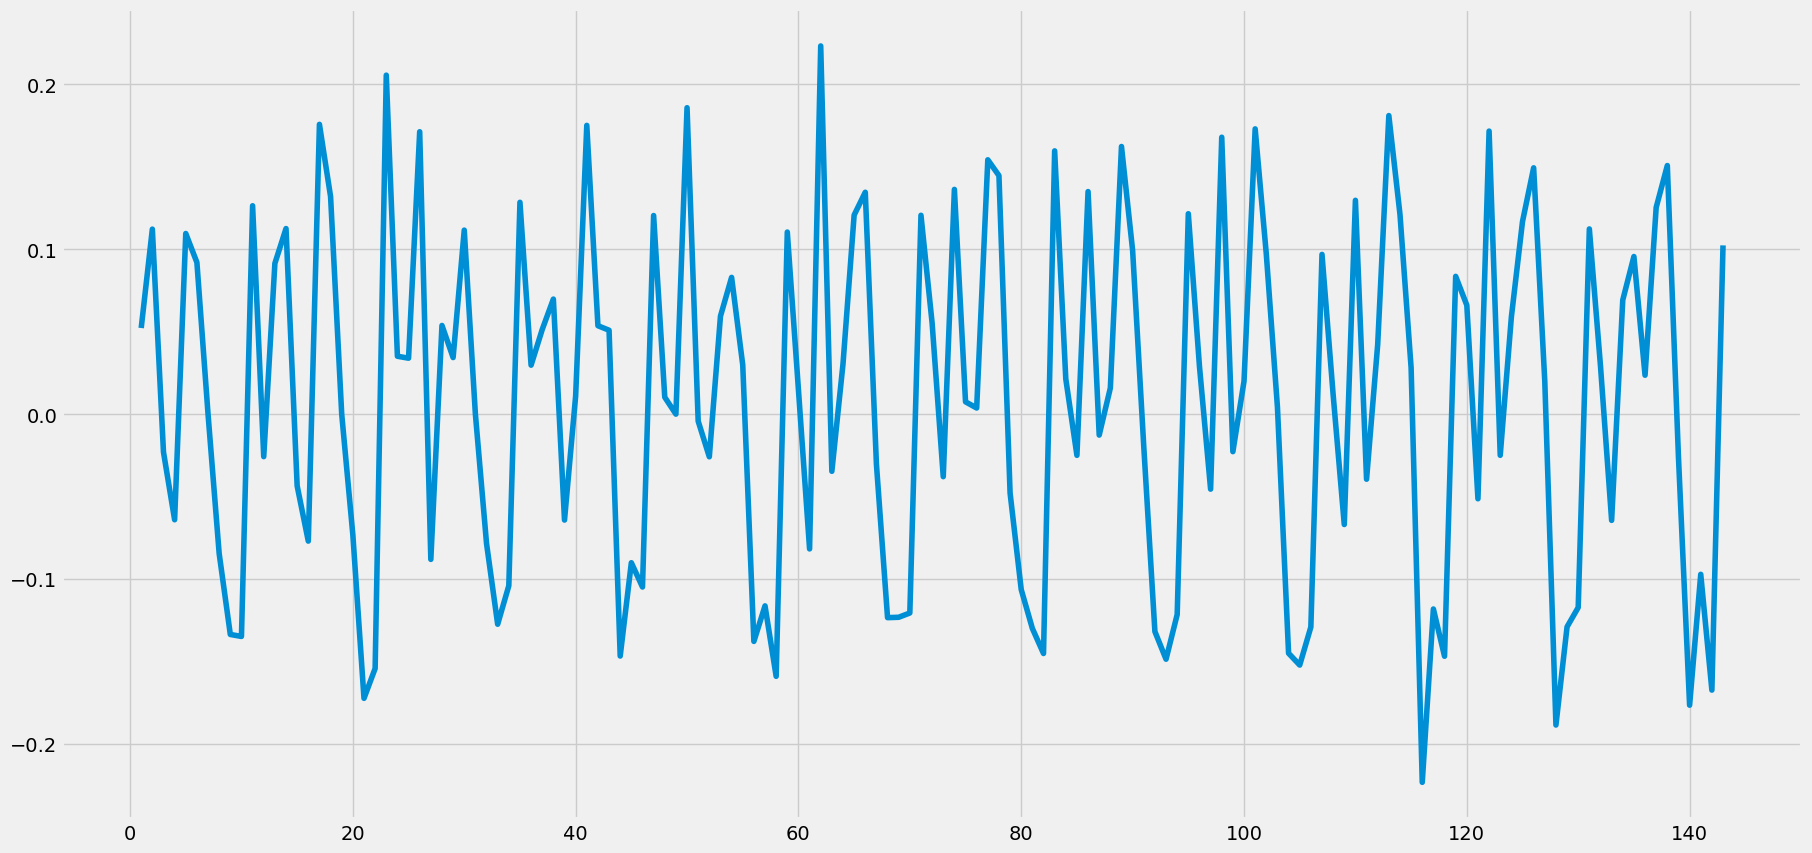

In [21]:
series["passengers4"] = series["#Passengers"].apply(np.log).diff()
series.passengers4.plot()
plt.show()

In [22]:
result = adfuller(series.passengers4[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.086110
p-value: 0.027598


/Users/mananshah/miniforge3/envs/ts_env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


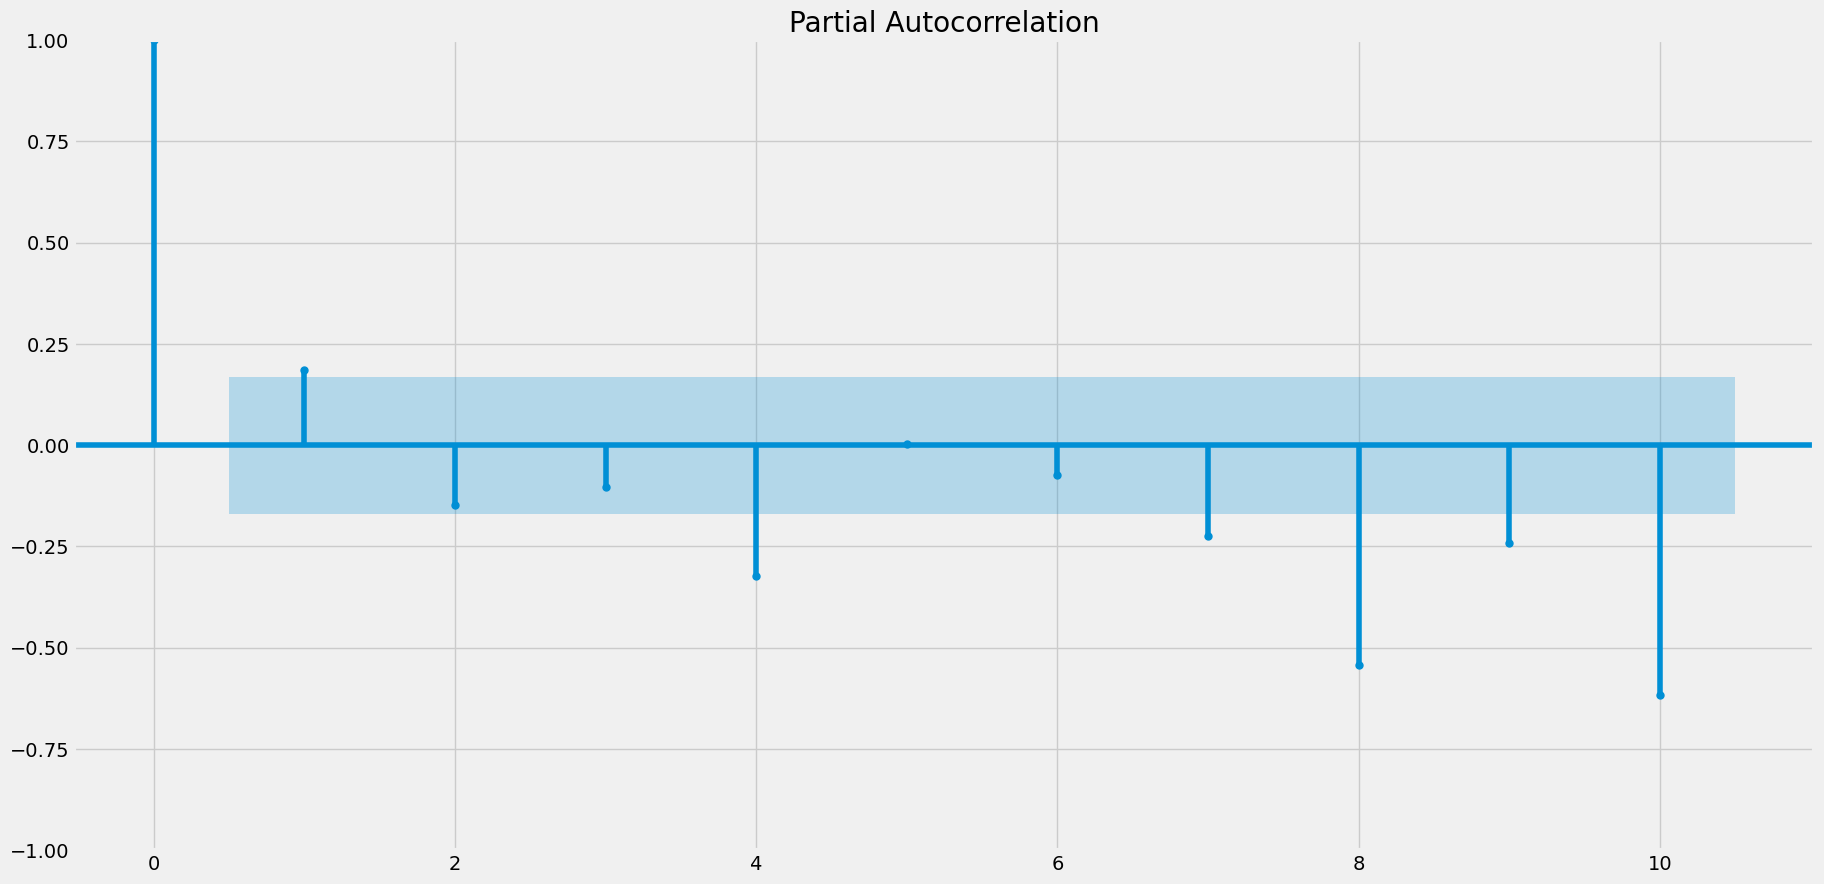

In [24]:
plot_pacf(series.passengers4[10:], lags=10)
plt.show()